## GROUP 5 PROJECT ON NPHA(NATIONAL POLL ON HEALTH AGING)

### **BELOW ARE PROJECT MEMBERS**

1.	IKUYINMINU OLUWASEGUN ROLAND  	CSC/18/955 **GROUP LEADER**
2.	OLOYEDE ISRAEL FUNMINIYI 	CSC/18/987
3.	BAMIGBOYE ENOCH OPEYEMI 	CSC/18/945
4.	FASAKIN SAMUEL OLALEKAN  	CSC/18/953
5.	IKUYINMINU MICHAEL  	CSC/18/956
6.	AKIN FAVOUR ZEVBUWA	CSC/DE/19/113
7.	DAODU OLUWAGBOTEMI FRANKLIN	CSC/18/948
8.	OLUGBEJE PROVIDENCE ERIOKAN	CSC/18/988



## Load packages

In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Part 1 : Data

The dataset **population-young-working-elderly-with-projections.csv** downloadable from here: https://ourworldindata.org/grapher/population-young-working-elderly-with-projections is an historic estimates of population young, working and elderly in the World from 1950 to 2021, and projected to 2100 based on the UN medium-fertility scenario.

The dataset **age-dependency-ratio-old.csv** downloadable from here: https://ourworldindata.org/grapher/age-dependency-ratio-old contains 
the ratio of the number of people older than 64 relative to the number of people in the working agepopulation (15-64 years). Data are shown as the number of dependents per 100 working-age population.

The dataset **NPHA-doctor-visits.csv** downloadable from here: https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha) is a subset of the NPHA dataset . The National Poll on Healthy Aging dataset was created to gather insights on the health, healthcare, and health policy issues affecting Americans aged 50 and older. By focusing on the perspectives of older adults and their caregivers, the University of Michigan aimed to inform the public, healthcare providers, policymakers, and advocates about the various aspects of aging. This includes topics like health insurance, household composition, sleep issues, dental care, prescription medications, and caregiving, thereby providing a comprehensive understanding of the health-related needs and concerns of the older population.

## Part 2 : Research question
In general, industrialized countries and those with advanced economies tend to have an older population than their working population. For example, many European nations such as Italy, Finland, Greece etc., Japan and some parts of North America have notable aging populations. Some of the major factors contributing to this dynamic include declining birth rates, increasing life expectancy, and advances in healthcare that allow people to live longer.
The increase in the elderly population has various consequences on the pension system and social security systems in general.
In Africa and some Asian nations, however, the working population tends to grow.

**Load data:**

In [2]:
population.young.working.elderly.with.projections <- read.csv("/kaggle/input/population-working-elderly/population-young-working-elderly-with-projections.csv")

age.dependency.ratio.old <- read.csv("/kaggle/input/population-working-elderly/age-dependency-ratio-old.csv")

world_population <- read.csv("/kaggle/input/world-population-dataset/world_population.csv")

df <- read.csv ("/kaggle/input/national-poll-on-healthy-aging-npha/NPHA-doctor-visits.csv")

head(population.young.working.elderly.with.projections)
head(age.dependency.ratio.old)
head(df)

,Entity,Code,Year,Population.by.broad.age.group...Sex..all...Age..65....Variant..estimates,Population.by.broad.age.group...Sex..all...Age..65....Variant..medium,Population...Sex..all...Age..15.64...Variant..estimates,Population...Sex..all...Age..15.64...Variant..medium,Population...Sex..all...Age..0.14...Variant..estimates,Population...Sex..all...Age..0.14...Variant..medium
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Afghanistan,AFG,1950,213022,NA,4198587,NA,3068855,NA
2,Afghanistan,AFG,1951,216096,NA,4250002,NA,3105444,NA
3,Afghanistan,AFG,1952,219028,NA,4303436,NA,3145070,NA
4,Afghanistan,AFG,1953,221925,NA,4356242,NA,3186382,NA
5,Afghanistan,AFG,1954,224755,NA,4408474,NA,3231060,NA
6,Afghanistan,AFG,1955,227633,NA,4462830,NA,3281470,NA


,Entity,Code,Year,Old.age.dependency.ratio...Sex..all...Age..none...Variant..estimates
,<chr>,<chr>,<int>,<dbl>
1,Afghanistan,AFG,1950,5.07
2,Afghanistan,AFG,1951,5.08
3,Afghanistan,AFG,1952,5.09
4,Afghanistan,AFG,1953,5.09
5,Afghanistan,AFG,1954,5.10
6,Afghanistan,AFG,1955,5.10


,Number.of.Doctors.Visited,Age,Phyiscal.Health,Mental.Health,Dental.Health,Employment,Stress.Keeps.Patient.from.Sleeping,Medication.Keeps.Patient.from.Sleeping,Pain.Keeps.Patient.from.Sleeping,Bathroom.Needs.Keeps.Patient.from.Sleeping,Uknown.Keeps.Patient.from.Sleeping,Trouble.Sleeping,Prescription.Sleep.Medication,Race,Gender
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
2,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
3,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
4,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
5,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2
6,2,2,3,2,4,3,0,0,0,1,0,3,3,1,1


## Part 3 : EDA

In [3]:
colnames(age.dependency.ratio.old)[4] <-"Old.age.dependency.ratio"

In [4]:
world_map <- map_data("world")
world_map$region[world_map$region=="USA"] <- "United States"
world_map$region[world_map$region=="UK"] <- "United Kingdom" 
world_map$region[world_map$region=="Democratic Republic of the Congo"] <- "Democratic Republic of Congo"

### Ratio of the number of the people older than 64 to the number of the people in working age (15-64 age)

In [5]:
dataset<-age.dependency.ratio.old %>%
  filter(Year==2021) %>%
  select(Entity,Old.age.dependency.ratio)

colnames(dataset)[1] <- "region"



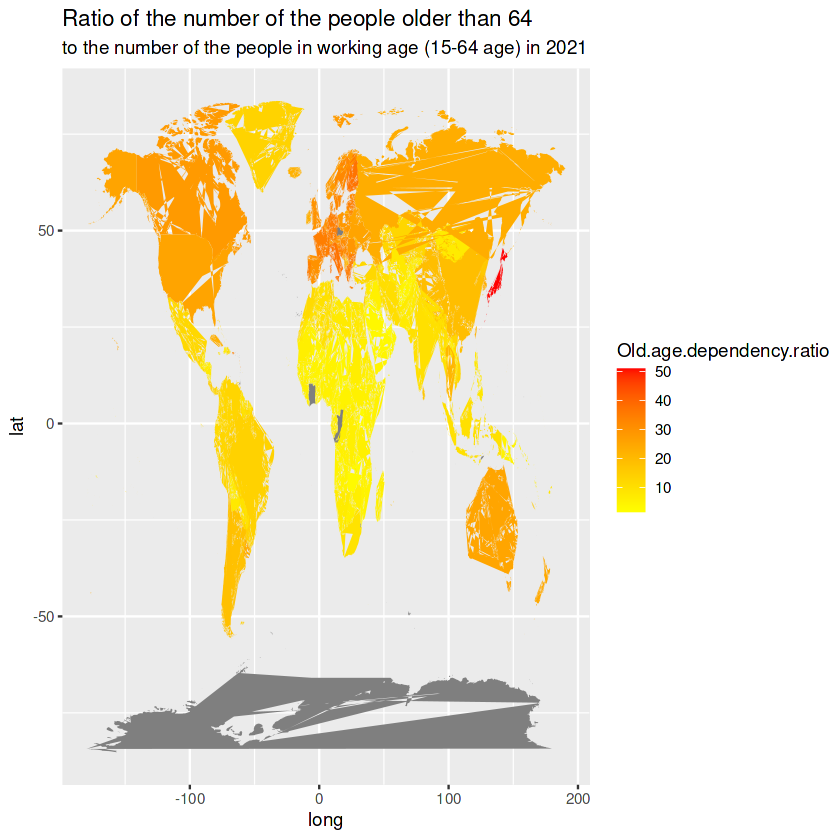

In [6]:

merged_data <- merge(world_map, dataset, by.x = "region", by.y = "region", all.x = TRUE)

merged_data <- merged_data[-which(merged_data$region=="Monaco") ,]


merged_data %>%
  ggplot() +
  geom_polygon( aes(x = long, y = lat, group = group, fill = Old.age.dependency.ratio)) +
scale_fill_gradient(low = "yellow", high = "red")+ 
ggtitle("Ratio of the number of the people older than 64", subtitle = "to the number of the people in working age (15-64 age) in 2021")

In [7]:
df<-world_population %>%
  select(CCA3,Continent)

colnames(df)[1] <- "Code"

age.dependency.ratio.old <-merge(age.dependency.ratio.old,df, by.x ="Code" )

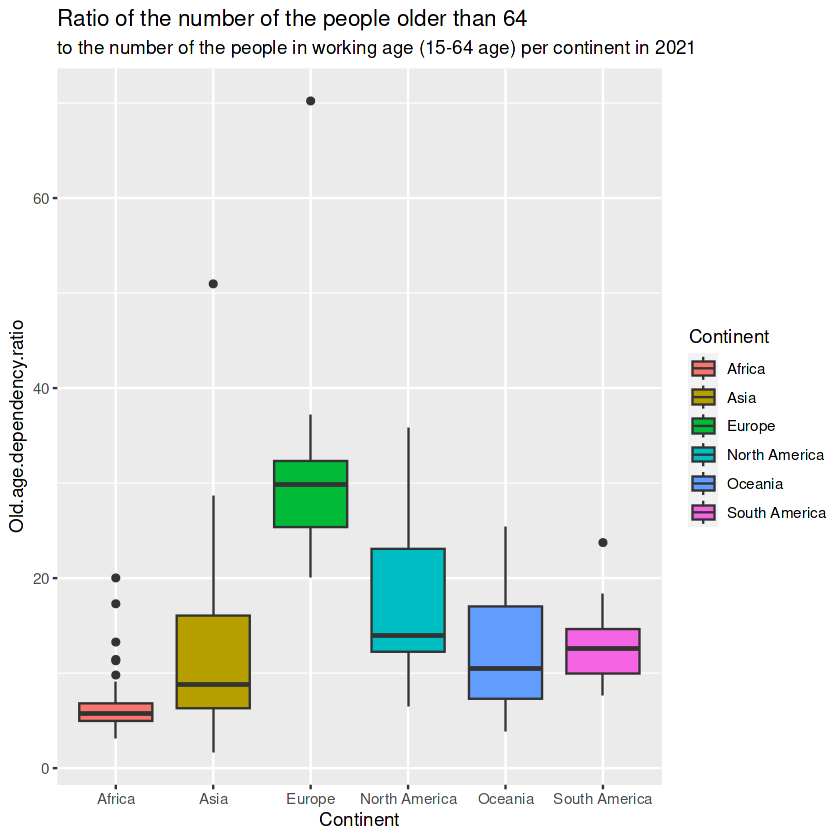

In [8]:
age.dependency.ratio.old %>%
  filter(Year==2021) %>%
  ggplot(aes(Continent,Old.age.dependency.ratio, fill=Continent))+
  geom_boxplot()+
  ylab("Old.age.dependency.ratio")+
  ggtitle("Ratio of the number of the people older than 64", subtitle = "to the number of the people in working age (15-64 age) per continent in 2021")

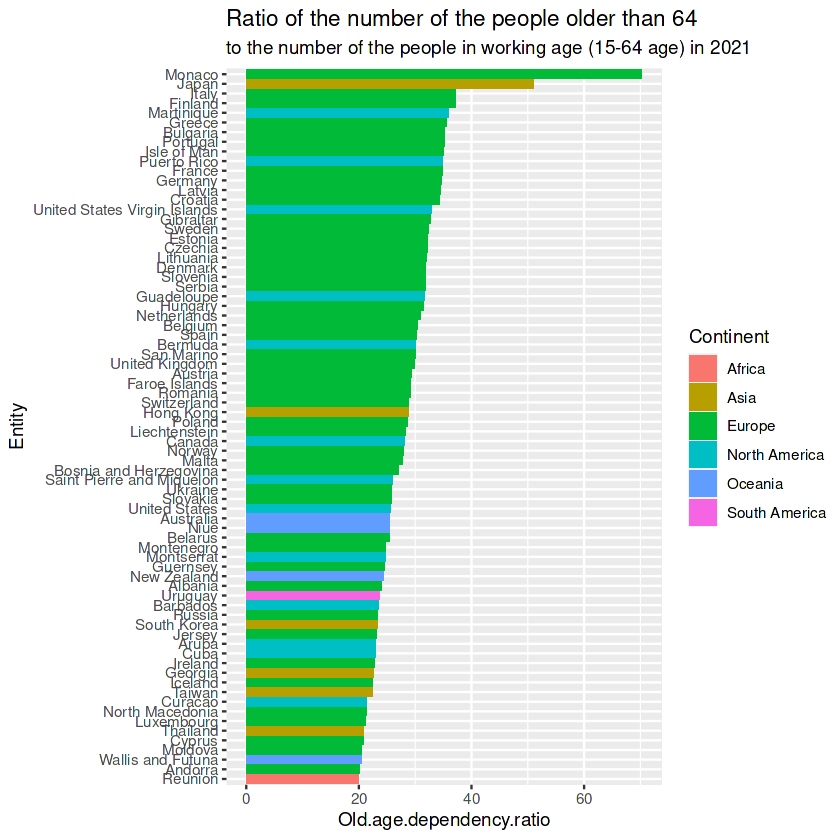

In [9]:
age.dependency.ratio.old %>%
  filter(Year==2021,Old.age.dependency.ratio>20) %>%
  mutate(Entity=reorder(Entity,Old.age.dependency.ratio)) %>%
  ggplot(aes(Entity,Old.age.dependency.ratio, fill=Continent))+
  geom_bar(stat = "identity")+
  coord_flip()+
  ylab("Old.age.dependency.ratio")+ 
ggtitle("Ratio of the number of the people older than 64", subtitle = "to the number of the people in working age (15-64 age) in 2021")

### Population working, elderly with projections


In [10]:
colnames(population.young.working.elderly.with.projections) [4] <- "Population_65+"
colnames(population.young.working.elderly.with.projections) [5] <- "Projection_65+"
colnames(population.young.working.elderly.with.projections) [6] <- "Population_15-64"
colnames(population.young.working.elderly.with.projections) [7] <- "Projection_15-64"
colnames(population.young.working.elderly.with.projections) [8] <- "Population_0-14"
colnames(population.young.working.elderly.with.projections) [9] <- "Projection_0-14"

In [11]:
population.young.working.elderly.with.projections$Population_elderly <-rowSums(population.young.working.elderly.with.projections[c("Population_65+", "Projection_65+")], na.rm = TRUE)

population.young.working.elderly.with.projections$Population_working <-rowSums(population.young.working.elderly.with.projections[c("Population_15-64", "Projection_15-64")], na.rm = TRUE)

population.young.working.elderly.with.projections$difference <- population.young.working.elderly.with.projections$Population_working - population.young.working.elderly.with.projections$Population_elderly 


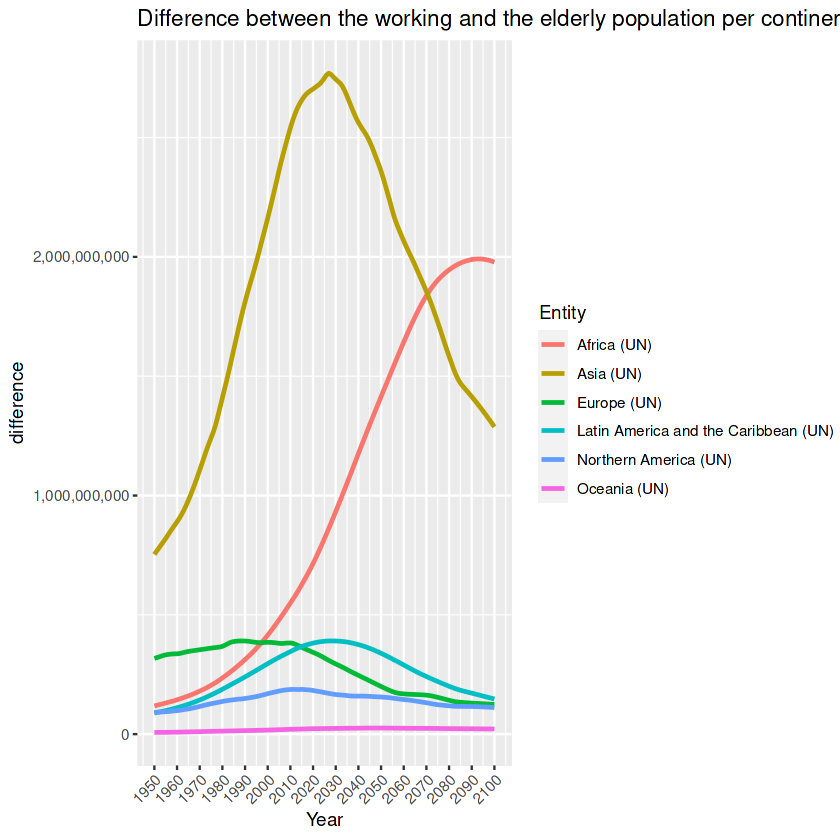

In [12]:
population.young.working.elderly.with.projections %>%
  filter(Entity %in% c("Africa (UN)","Asia (UN)","Europe (UN)", "Latin America and the Caribbean (UN)","Northern America (UN)", "Oceania (UN)"   ), !is.na(difference)) %>%
  ggplot(aes(Year,difference, colour=Entity))+
  geom_line(linewidth=1)+
  scale_y_continuous(labels = label_comma())+
  scale_x_continuous(breaks = seq(1950,2100,10))+
  theme(axis.text.x = element_text(angle=45,hjust=1))+
  ggtitle("Difference between the working and the elderly population per continent")
  

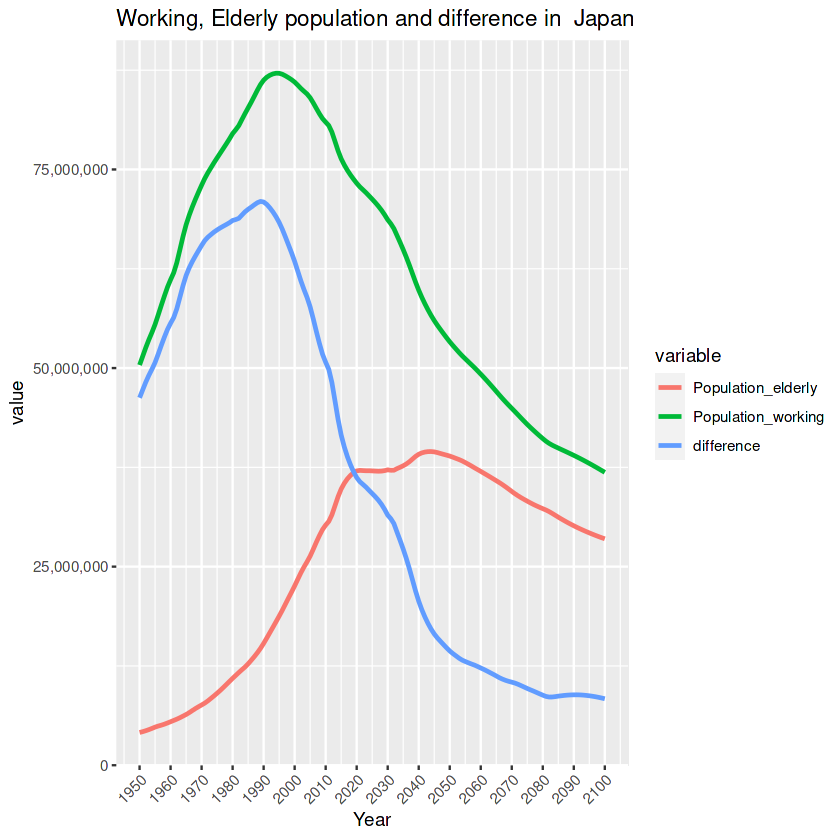

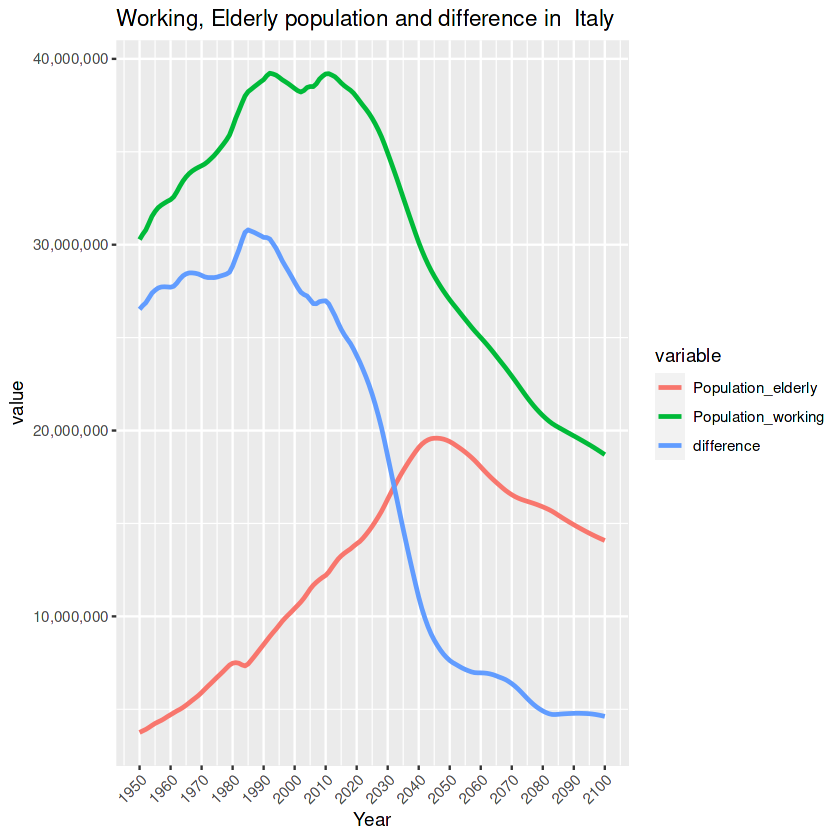

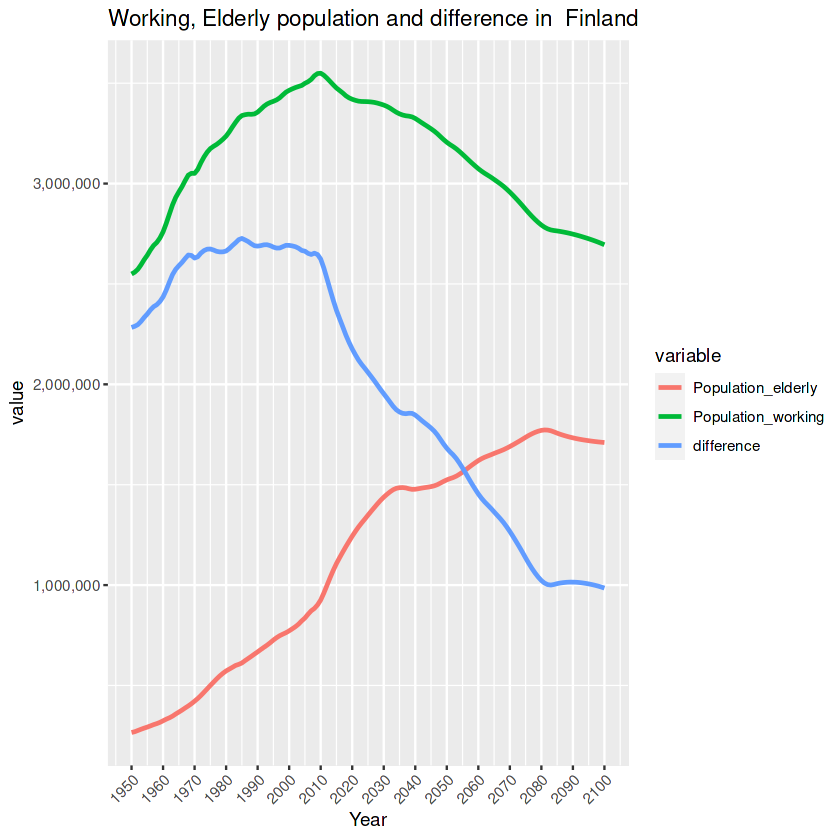

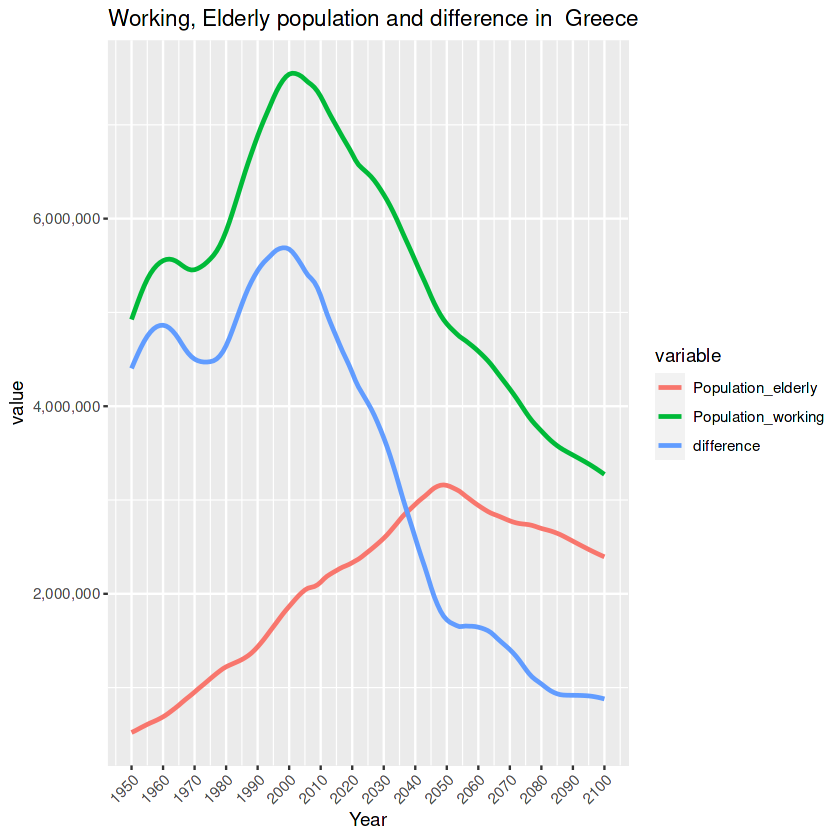

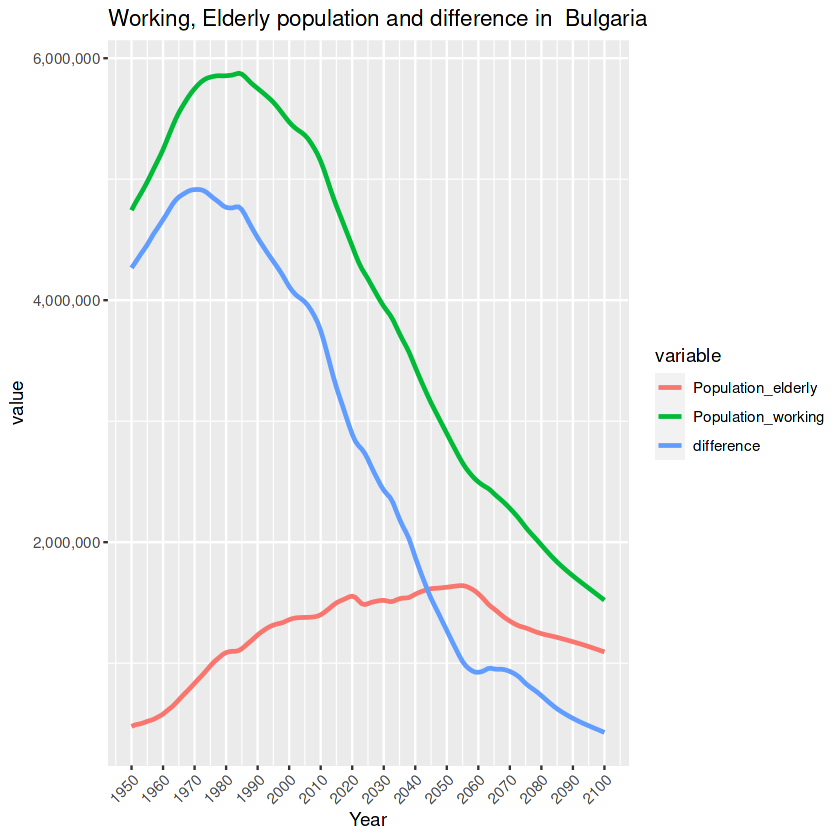

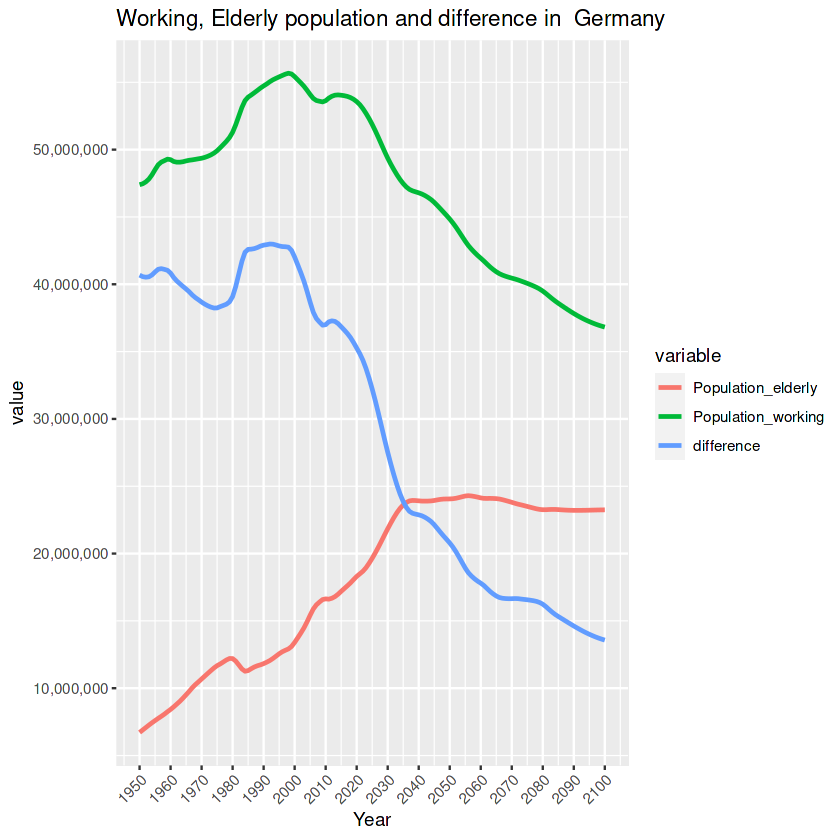

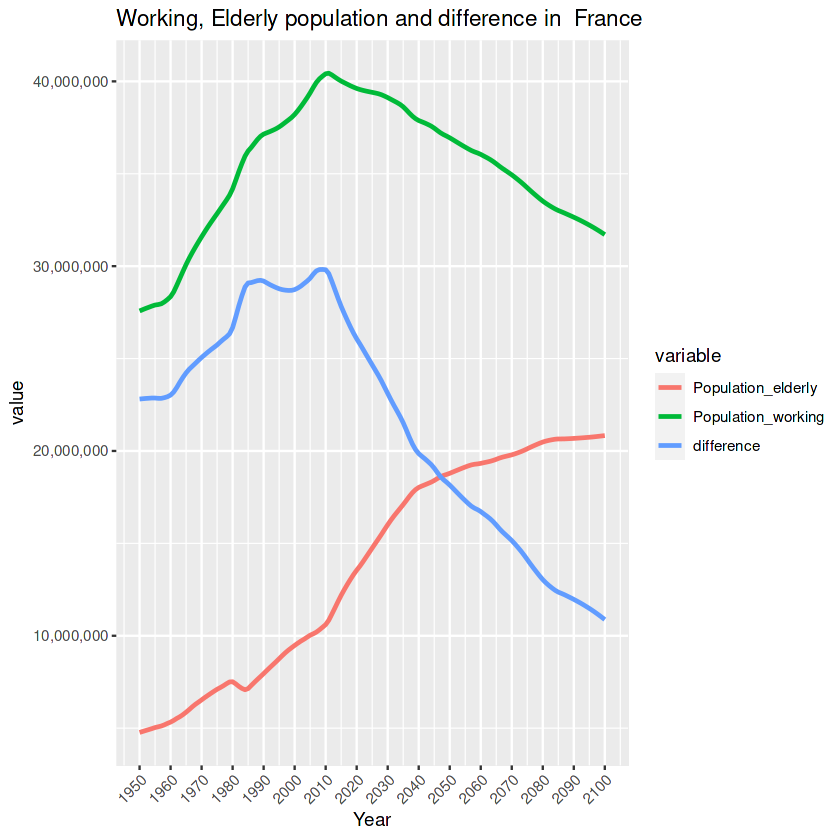

In [13]:
for (country in c("Japan","Italy","Finland", "Greece","Bulgaria", "Germany","France")) {

  df1 <- population.young.working.elderly.with.projections %>%
  filter(Entity==country) %>%
  select(Year,Population_elderly, Population_working, difference)

  df1 <- melt(df1, id="Year")

  g<-df1 %>%
  ggplot(aes(Year, value, colour=variable))+
  geom_line(linewidth=1)+
  scale_y_continuous(labels = label_comma())+
  scale_x_continuous(breaks = seq(1950,2100,10))+
  theme(axis.text.x = element_text(angle=45,hjust=1))+
  ggtitle(paste("Working, Elderly population and difference in ",country))  
  
  print(g)
    
}





### Subset of the NPHA (National Poll of Healthy Aging)



In [18]:
df <- read.csv ("/kaggle/input/national-poll-on-healthy-aging-npha/NPHA-doctor-visits.csv")

# Convert Number of Doctors Visited to categorical
df$Number.of.Doctors.Visited <- factor(df$Number.of.Doctors.Visited , 
                                           levels = c(1, 2, 3),
                                           labels = c("0-1 doctors", "2-3 doctors", "4 or more doctors"))

# Convert Age to categorical
df$Age <- factor(df$Age , 
                                           levels = c(1, 2),
                                           labels = c("50-64", "65-80"))

# Convert Physical Health, Mental Health, Dental Health to categorical
cols.to.convert <- c("Phyiscal.Health", "Mental.Health", "Dental.Health")
for (col in cols.to.convert) {
  df[[col]] <- factor(df[[col]], levels = c(-1, 1, 2, 3, 4, 5),
                      labels = c("Refused", "Excellent", "Very Good", "Good", "Fair", "Poor"))
}

# Convert Employment to categorical
df$Employment <- factor(df$Employment, levels = c(-1, 1, 2, 3, 4),
                        labels = c("Refused", "Working full-time", "Working part-time", "Retired", "Not working at this time"))

# Convert binary columns to factor
binary.cols <- c("Stress.Keeps.Patient.from.Sleeping", "Medication.Keeps.Patient.from.Sleeping", 
                 "Pain.Keeps.Patient.from.Sleeping", "Bathroom.Needs.Keeps.Patient.from.Sleeping", 
                 "Uknown.Keeps.Patient.from.Sleeping", "Trouble.Sleeping")


df[binary.cols] <- lapply(df[binary.cols], factor, levels = c(0, 1), labels = c("No", "Yes"))

# Convert Prescription Sleep Medication to categorical
df$Prescription.Sleep.Medication <- factor(df$Prescription.Sleep.Medication, 
                                           levels = c(-1, 1, 2, 3),
                                           labels = c("Refused", "Use regularly", "Use occasionally", "Do not use"))

# Convert Race to categorical
df$Race <- factor(df$Race, 
                  levels = c(-2, -1, 1, 2, 3, 4, 5),
                  labels = c("Not asked", "REFUSED", "White, Non-Hispanic", "Black, Non-Hispanic","Other, Non-Hispanic", "Hispanic", "2+ Races, Non-Hispanic"))

# Convert Gender to categorical
df$Gender <- factor(df$Gender, 
                    levels = c(-2, -1, 1, 2),
                    labels = c("Not asked", "REFUSED", "Male", "Female"))

head(df)

,Number.of.Doctors.Visited,Age,Phyiscal.Health,Mental.Health,Dental.Health,Employment,Stress.Keeps.Patient.from.Sleeping,Medication.Keeps.Patient.from.Sleeping,Pain.Keeps.Patient.from.Sleeping,Bathroom.Needs.Keeps.Patient.from.Sleeping,Uknown.Keeps.Patient.from.Sleeping,Trouble.Sleeping,Prescription.Sleep.Medication,Race,Gender
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,4 or more doctors,65-80,Fair,Good,Good,Retired,No,No,No,No,Yes,NA,Do not use,"White, Non-Hispanic",Female
2,2-3 doctors,65-80,Fair,Very Good,Good,Retired,Yes,No,No,Yes,No,NA,Do not use,"White, Non-Hispanic",Male
3,4 or more doctors,65-80,Good,Very Good,Good,Retired,No,No,No,No,Yes,NA,Do not use,Hispanic,Male
4,0-1 doctors,65-80,Good,Very Good,Good,Retired,No,No,No,Yes,No,NA,Do not use,Hispanic,Female
5,4 or more doctors,65-80,Good,Good,Good,Retired,Yes,No,No,No,No,NA,Do not use,"White, Non-Hispanic",Female
6,2-3 doctors,65-80,Good,Very Good,Fair,Retired,No,No,No,Yes,No,NA,Do not use,"White, Non-Hispanic",Male


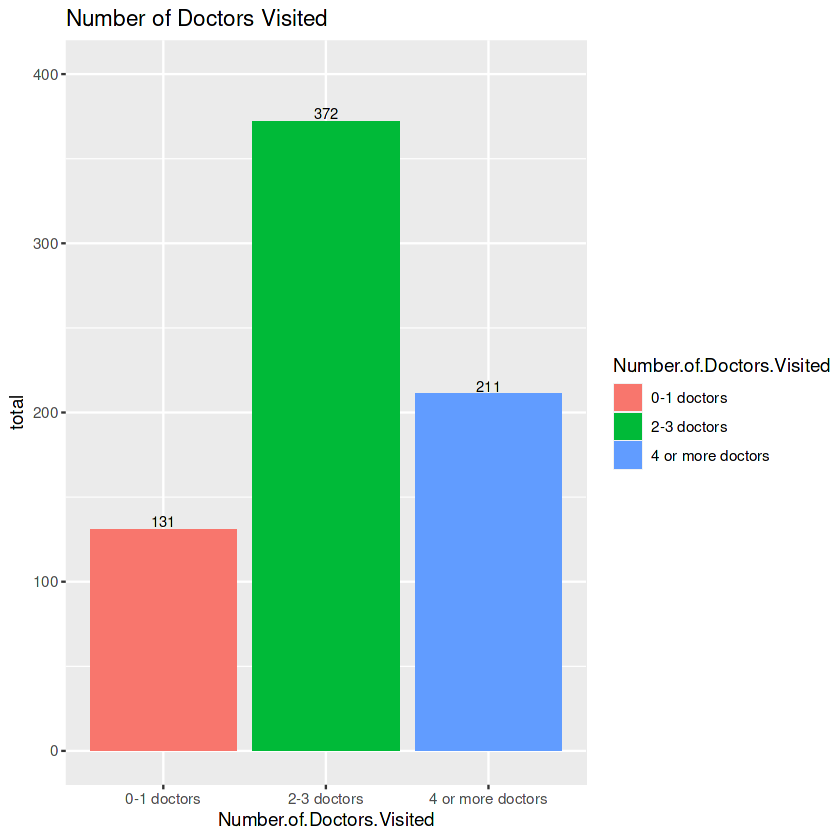

In [19]:
df %>%
  group_by(Number.of.Doctors.Visited) %>%
  summarise(total=n()) %>%
  ggplot(aes(Number.of.Doctors.Visited,total, fill=Number.of.Doctors.Visited))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=-0.2, size=3)+
  ylim(0,400)+
  ggtitle("Number of Doctors Visited")

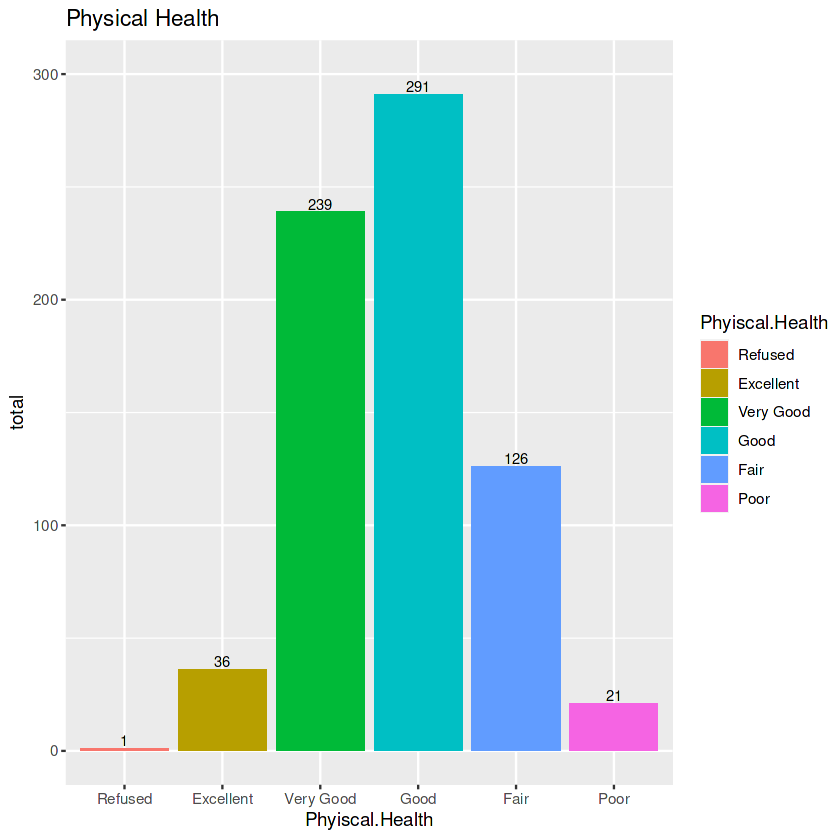

In [20]:
df %>%
  group_by(Phyiscal.Health) %>%
  summarise(total=n()) %>%
  ggplot(aes(Phyiscal.Health,total, fill=Phyiscal.Health))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=-0.2, size=3)+
  ylim(0,300)+
  ggtitle("Physical Health")

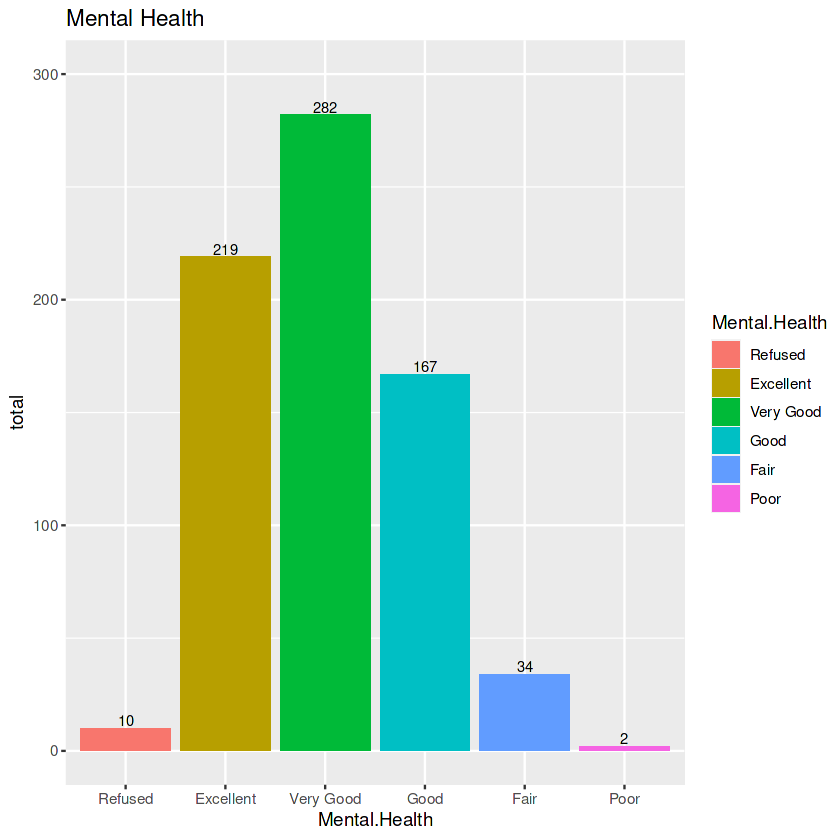

In [21]:
df %>%
  group_by(Mental.Health) %>%
  summarise(total=n()) %>%
  ggplot(aes(Mental.Health,total, fill=Mental.Health))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=-0.2, size=3)+
  ylim(0,300)+
  ggtitle("Mental Health")

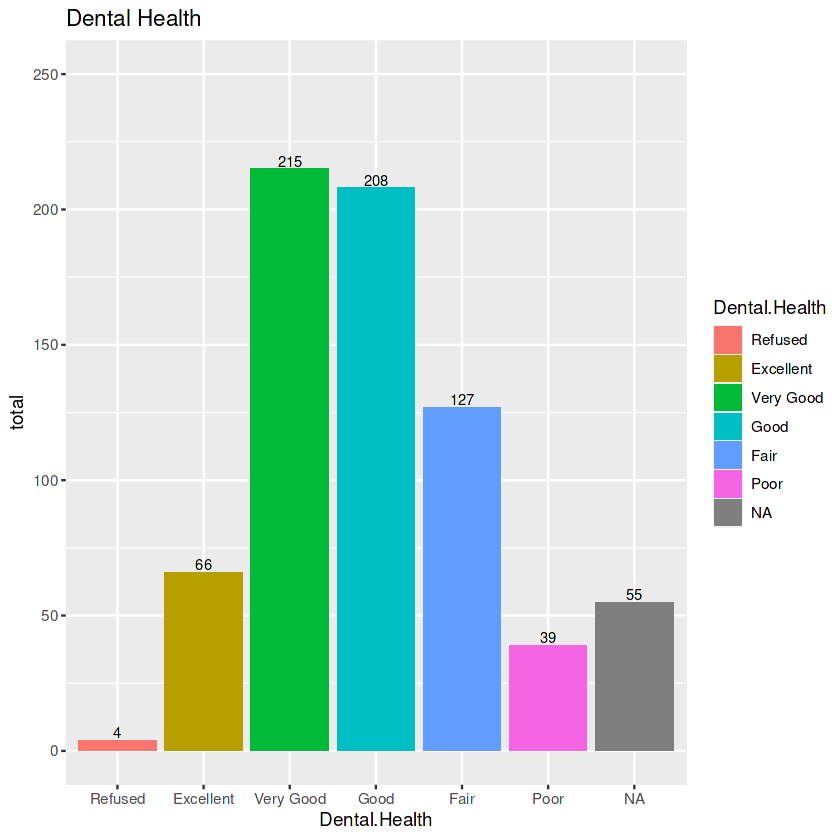

In [22]:
df %>%
  group_by(Dental.Health) %>%
  summarise(total=n()) %>%
  ggplot(aes(Dental.Health,total, fill=Dental.Health))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=-0.2, size=3)+
  ylim(0,250)+
  ggtitle("Dental Health")

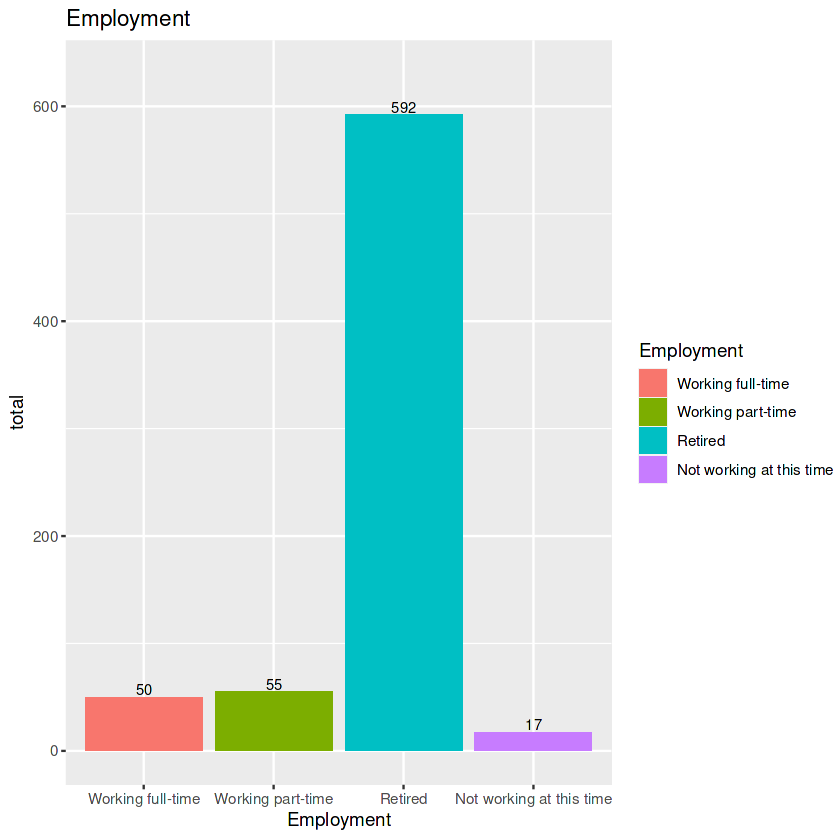

In [23]:
df %>%
  group_by(Employment) %>%
  summarise(total=n()) %>%
  ggplot(aes(Employment,total, fill=Employment))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=-0.2, size=3)+
  ylim(0,630)+
  ggtitle("Employment")

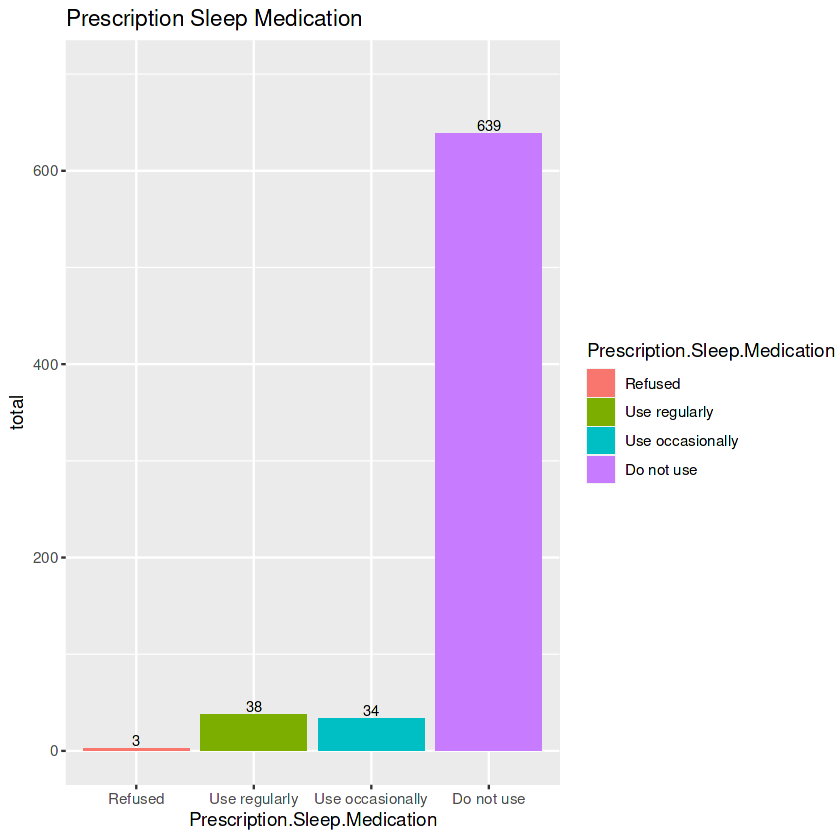

In [24]:
df %>%
  group_by(Prescription.Sleep.Medication) %>%
  summarise(total=n()) %>%
  ggplot(aes(Prescription.Sleep.Medication,total, fill=Prescription.Sleep.Medication))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=-0.2, size=3)+
  ylim(0,700)+
  ggtitle("Prescription Sleep Medication")